# **Your Match, Your Score**

Importing Libraries:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Loading Data:

In [8]:
data = pd.read_csv('/all_games.csv')

<ipython-input-8-54babf1c0512>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/all_games.csv')


Displaying the first few rows of the dataset:

In [9]:
print(data.head())

  Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   

  HTR  ... GBA  BSH  BSD  BSA  SBH  SBD  SBA   X  X.1  X.2  
0   H  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
1   H  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
2   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
3   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
4   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  

[5 rows x 82 columns]


Encoding the Full Time Result (FTR):

In [10]:
data['FTR'] = data['FTR'].map({'H': 1, 'D': 0, 'A': -1})

Checking for missing values:

In [5]:
print(data.isnull().sum())

Team                           0
DribbledPast                   0
Interception                   0
Fouled                         0
Fouls                          0
Yellow                         0
Red                            0
Clearance                      0
Total block                    0
Total goals                    0
Successful Dribble             0
Total Aerial challenges        0
AccLB                          0
InAccLB                        0
AccSP                          0
InAccSP                        0
Possession per game            0
Average salary per week_1      0
Summer transfer_1              0
Net spend on transfer          0
Average attendance per game    0
dtype: int64


Creating features for home team strength and away team defense:

In [97]:
data['HomeTeamStrength'] = data.groupby('HomeTeam')['FTHG'].transform('mean')
data['AwayTeamDefense'] = data.groupby('AwayTeam')['FTAG'].transform('mean')

Selecting relevant features:

In [98]:
features = ['HomeTeamStrength', 'AwayTeamDefense', 'FTHG', 'FTAG', 'HS', 'AS']
X = data[features]
y = data['FTR']

Splitting the Data:

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building ML Model:

In [113]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Evaluating the Model:

In [114]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 99.97261774370209 %


Confusion Matrix:

In [115]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1046    1    0]
 [   0  912    0]
 [   0    0 1693]]


Predicting Future Matches:

Confusion Matrix:
 [[1046    1    0]
 [   0  912    0]
 [   0    0 1693]]
Displaying Confusion Matrix:


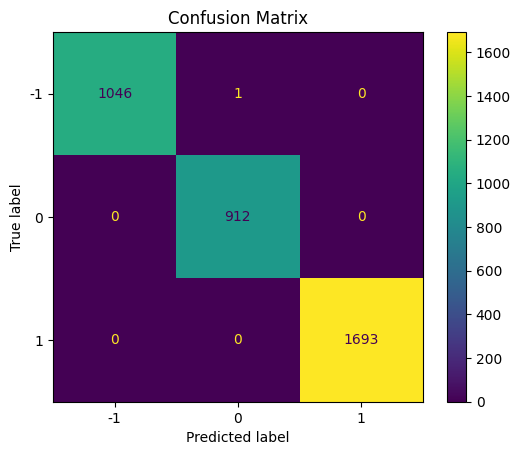

------------------------------
Predicting a new match:
Predicted Result: [0]
------------------------------


In [116]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

import matplotlib.pyplot as plt

print("Displaying Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
print("-" * 30)

print("Predicting a new match:")

new_match = pd.DataFrame({
    'HomeTeamStrength': [1.5],
    'AwayTeamDefense': [1.0],
    'FTHG': [0],
    'FTAG': [0],
    'HS': [0],
    'AS': [0]
})
prediction = model.predict(new_match)
print("Predicted Result:", prediction)
print("-" * 30)

# **Custom Prediction for teams**

Getting unique teams from both columns:

In [117]:
home_teams = data['HomeTeam'].unique()
away_teams = data['AwayTeam'].unique()

Combining and getting all unique team names:

In [118]:
all_teams = set(home_teams) | set(away_teams)
all_teams = sorted(all_teams)

Displaying the team names:

In [119]:
print("All Teams:", all_teams)


All Teams: ['Ajaccio', 'Ajaccio GFCO', 'Alaves', 'Almeria', 'Amiens', 'Angers', 'Arles', 'Arsenal', 'Aston Villa', 'Atalanta', 'Ath Bilbao', 'Ath Madrid', 'Augsburg', 'Auxerre', 'Barcelona', 'Bari', 'Bastia', 'Bayern Munich', 'Benevento', 'Betis', 'Birmingham', 'Blackburn', 'Blackpool', 'Bochum', 'Bologna', 'Bolton', 'Bordeaux', 'Boulogne', 'Bournemouth', 'Braunschweig', 'Brescia', 'Brest', 'Brighton', 'Burnley', 'Caen', 'Cagliari', 'Cardiff', 'Carpi', 'Catania', 'Celta', 'Cesena', 'Chelsea', 'Chievo', 'Cordoba', 'Crotone', 'Crystal Palace', 'Darmstadt', 'Dijon', 'Dortmund', 'Eibar', 'Ein Frankfurt', 'Elche', 'Empoli', 'Espanol', 'Everton', 'Evian Thonon Gaillard', 'FC Koln', 'Fiorentina', 'Fortuna Dusseldorf', 'Freiburg', 'Frosinone', 'Fulham', 'Genoa', 'Getafe', 'Girona', 'Granada', 'Grenoble', 'Greuther Furth', 'Guingamp', 'Hamburg', 'Hannover', 'Hercules', 'Hertha', 'Hoffenheim', 'Huddersfield', 'Huesca', 'Hull', 'Ingolstadt', 'Inter', 'Juventus', 'Kaiserslautern', 'La Coruna', 'La

Preparing team stats:

In [120]:
home_stats = data.groupby('HomeTeam').agg({
    'FTHG': 'mean',
    'HS': 'mean',

}).rename(columns={
    'FTHG': 'AvgHomeGoals',
    'HS': 'AvgHomeShots'
})

away_stats = data.groupby('AwayTeam').agg({
    'FTAG': 'mean',
    'AS': 'mean',

}).rename(columns={
    'FTAG': 'AvgAwayGoals',
    'AS': 'AvgAwayShots'
})

team_stats = pd.merge(home_stats, away_stats, left_index=True, right_index=True, how='outer')
team_stats.fillna(0, inplace=True)

Printing availabe teams:

In [121]:
print("\nAvailable Teams:")
for team in sorted(team_stats.index):
    print("•", team)


Available Teams:
• Ajaccio
• Ajaccio GFCO
• Alaves
• Almeria
• Amiens
• Angers
• Arles
• Arsenal
• Aston Villa
• Atalanta
• Ath Bilbao
• Ath Madrid
• Augsburg
• Auxerre
• Barcelona
• Bari
• Bastia
• Bayern Munich
• Benevento
• Betis
• Birmingham
• Blackburn
• Blackpool
• Bochum
• Bologna
• Bolton
• Bordeaux
• Boulogne
• Bournemouth
• Braunschweig
• Brescia
• Brest
• Brighton
• Burnley
• Caen
• Cagliari
• Cardiff
• Carpi
• Catania
• Celta
• Cesena
• Chelsea
• Chievo
• Cordoba
• Crotone
• Crystal Palace
• Darmstadt
• Dijon
• Dortmund
• Eibar
• Ein Frankfurt
• Elche
• Empoli
• Espanol
• Everton
• Evian Thonon Gaillard
• FC Koln
• Fiorentina
• Fortuna Dusseldorf
• Freiburg
• Frosinone
• Fulham
• Genoa
• Getafe
• Girona
• Granada
• Grenoble
• Greuther Furth
• Guingamp
• Hamburg
• Hannover
• Hercules
• Hertha
• Hoffenheim
• Huddersfield
• Huesca
• Hull
• Ingolstadt
• Inter
• Juventus
• Kaiserslautern
• La Coruna
• Las Palmas
• Lazio
• Le Mans
• Lecce
• Leganes
• Leicester
• Lens
• Levante
•

Taking user input teams:

In [122]:
home_team = input("\nEnter Home Team: ")
away_team = input("Enter Away Team: ")


Enter Home Team: Arsenal
Enter Away Team: Nice


Checking if both teams are valid and predicting the results given in input:

In [123]:
if home_team not in team_stats.index or away_team not in team_stats.index:
    print("❌ One or both team names are incorrect.")
else:
    print("✅ Both teams are valid.")
    new_match = pd.DataFrame({
        'HomeTeamStrength': [team_stats.loc[home_team, 'AvgHomeGoals']],
        'AwayTeamDefense': [team_stats.loc[away_team, 'AvgAwayGoals']],
        'FTHG': [0],
        'FTAG': [0],
        'HS': [team_stats.loc[home_team, 'AvgHomeShots']],
        'AS': [team_stats.loc[away_team, 'AvgAwayShots']],
    })
    prediction = model.predict(new_match)
    label = prediction[0]

    if label == 0:
        result = f"🏠 {home_team} wins (Home Win)"
    elif label == 1:
        result = "⚖️ Draw"
    else:
        result = f"✈️ {away_team} wins Away Win"

    print(f"\n📊 Prediction: {home_team} vs {away_team} → {result}")

✅ Both teams are valid.

📊 Prediction: Arsenal vs Nice → 🏠 Arsenal wins (Home Win)
